In [1]:
import pandas as pd
import numpy as np
import collections
import re

In [2]:
f=open("text.txt")
doc1=f.read()
f.close()



In [3]:

doc1

'Hello friend I am intrigued with the working of Deep Learning.'

In [4]:
l_doc1 = re.sub(r"[^a-zA-Z0-9]", " ", doc1.lower()).split()


In [5]:
l_doc1

['hello',
 'friend',
 'i',
 'am',
 'intrigued',
 'with',
 'the',
 'working',
 'of',
 'deep',
 'learning']

In [6]:
l=l_doc1

In [7]:
l

['hello',
 'friend',
 'i',
 'am',
 'intrigued',
 'with',
 'the',
 'working',
 'of',
 'deep',
 'learning']

In [8]:
wordset=set(l)

In [9]:
wordset

{'am',
 'deep',
 'friend',
 'hello',
 'i',
 'intrigued',
 'learning',
 'of',
 'the',
 'with',
 'working'}

In [10]:
def calculateBOW(wordset,l_doc):
  tf_diz = dict.fromkeys(wordset,0)
  for word in l_doc:
      tf_diz[word]=l_doc.count(word)
  return tf_diz

In [11]:
bow1 = calculateBOW(wordset,l_doc1)
df_bow = pd.DataFrame([bow1])
df_bow.head()

,intrigued,friend,learning,the,working,am,deep,of,hello,with,i
0,1,1,1,1,1,1,1,1,1,1,1


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [13]:
X = vectorizer.fit_transform([doc1])
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
df_bow_sklearn.head()

,am,deep,friend,hello,intrigued,learning,of,the,with,working
0,1,1,1,1,1,1,1,1,1,1


In [14]:
print(vectorizer.get_feature_names_out())

['am' 'deep' 'friend' 'hello' 'intrigued' 'learning' 'of' 'the' 'with'
 'working']


In [15]:
import nltk
nltk.download('punkt')
import re
import numpy as np

f= open("text.txt")
text=f.read()
f.close()
dataset = nltk.sent_tokenize(text)
for i in range(len(dataset)):
    dataset[i] = dataset[i].lower()
    dataset[i] = re.sub(r'\W', ' ', dataset[i])
    dataset[i] = re.sub(r'\s+', ' ', dataset[i])

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\ANANYAPRANAV/nltk_data'
    - 'C:\\ProgramData\\anaconda3\\nltk_data'
    - 'C:\\ProgramData\\anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\ANANYAPRANAV\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [25]:
!pip install nltk


Defaulting to user installation because normal site-packages is not writeable


In [32]:
print(dataset)

NameError: name 'dataset' is not defined

In [20]:
word2count = {}
for data in dataset:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [21]:
word2count

{'hello': 1,
 'friend': 1,
 'i': 1,
 'am': 1,
 'intrigued': 1,
 'with': 1,
 'the': 1,
 'working': 1,
 'of': 1,
 'deep': 1,
 'learning': 1}

In [22]:
words


['hello',
 'friend',
 'i',
 'am',
 'intrigued',
 'with',
 'the',
 'working',
 'of',
 'deep',
 'learning']

In [23]:
len(words)

11

In [24]:
vocab_size = len(wordset)
embed_dim = 10
context_size = 4

In [25]:
word_to_ix = {word: i for i, word in enumerate(wordset)}
ix_to_word = {i: word for i, word in enumerate(wordset)}

In [26]:
word_to_ix

{'deep': 0,
 'i': 1,
 'the': 2,
 'intrigued': 3,
 'of': 4,
 'friend': 5,
 'learning': 6,
 'with': 7,
 'am': 8,
 'working': 9,
 'hello': 10}

In [27]:
ix_to_word

{0: 'deep',
 1: 'i',
 2: 'the',
 3: 'intrigued',
 4: 'of',
 5: 'friend',
 6: 'learning',
 7: 'with',
 8: 'am',
 9: 'working',
 10: 'hello'}

In [28]:
data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:5])

[(['hello', 'friend', 'am', 'intrigued'], 'i'), (['friend', 'i', 'intrigued', 'with'], 'am'), (['i', 'am', 'with', 'the'], 'intrigued'), (['am', 'intrigued', 'the', 'working'], 'with'), (['intrigued', 'with', 'working', 'of'], 'the')]


In [29]:
embeddings =  np.random.random_sample((vocab_size, embed_dim))

In [30]:
embeddings

array([[0.40463181, 0.19545648, 0.82183886, 0.40694596, 0.8556774 ,
        0.63108154, 0.03799057, 0.15764832, 0.09105446, 0.45521354],
       [0.93260684, 0.3310366 , 0.7582561 , 0.3913739 , 0.53596495,
        0.28322941, 0.63200426, 0.44957832, 0.53543522, 0.51177561],
       [0.86506537, 0.83964949, 0.09520262, 0.57255732, 0.12082813,
        0.50665234, 0.81465349, 0.38598333, 0.02078089, 0.25991999],
       [0.16780289, 0.1525643 , 0.58299333, 0.41771324, 0.20552448,
        0.77889798, 0.65161397, 0.88491933, 0.08479714, 0.8854379 ],
       [0.20485679, 0.68784483, 0.71376171, 0.71132597, 0.5212528 ,
        0.23864884, 0.25762618, 0.20084271, 0.10902986, 0.8892242 ],
       [0.4431827 , 0.48753789, 0.5729309 , 0.72517362, 0.44171963,
        0.79719605, 0.59274187, 0.37358548, 0.91825077, 0.33505887],
       [0.05608614, 0.48674486, 0.14472897, 0.90787636, 0.62789395,
        0.14868063, 0.07508385, 0.97378016, 0.67128476, 0.37710664],
       [0.04646213, 0.4360461 , 0.8299809

In [31]:
def linear(m, theta):
    w = theta
    return m.dot(w)

In [32]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [33]:
import tensorflow as tf
import keras.backend as k
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

In [34]:
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1

    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)

    return (- out + softmax) / logits.shape[0]

In [35]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)

    return m, n, o

In [36]:
def backward(preds, theta, target_idxs):
    m, n, o = preds

    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)

    return dw

In [37]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

In [38]:
theta = np.random.uniform(-1, 1, ( context_size * embed_dim, vocab_size))

In [39]:
epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)

        epoch_losses[epoch] = losses

Text(0, 0.5, 'Losses')

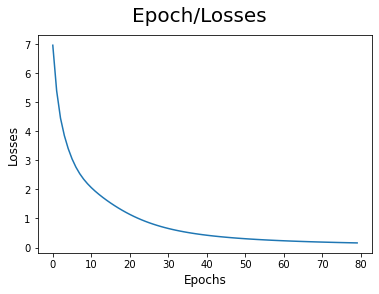

In [40]:
import matplotlib.pyplot as plt
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [50]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]

    return word
predicted=predict(['deep', 'am', 'intrigued', 'with'])

In [51]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1

    return (1 - (wrong / len(data)))
accuracy()

1.0